## Sep Tutorial

Import necessary libraries:

In [1]:
import numpy as np
import sep 
import astropy

Import plotting/fits handling tools, set default figure size

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

Open FITS file, and load the Header/Data list (gives access to image data)

In [9]:
hdul = astropy.io.fits.open("image.fits")

Extract image data and display it with contrast/grayscale

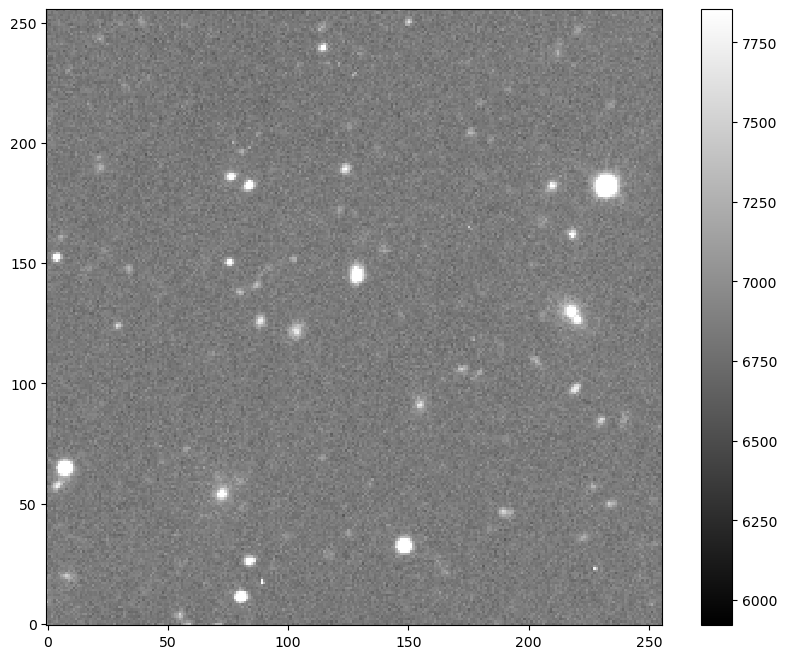

In [16]:
data = hdul[0].data
m, s = np.mean(data), np.std(data)

plt.figure()
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m - s, vmax=m + s, origin='lower')
plt.colorbar()
plt.savefig("fitsimage1.png")
plt.show()


Estimate how to model the background using SEP

In [40]:

bkg = sep.Background(data)

Print global background stats: <br>
globalback: average backgorund level of the image <br>
globalrms: root-mean-square of the background (noise estimate)

In [41]:

print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


generate a 2D model of the backgroudn

In [42]:

bkg_image = bkg.back()

plot the background

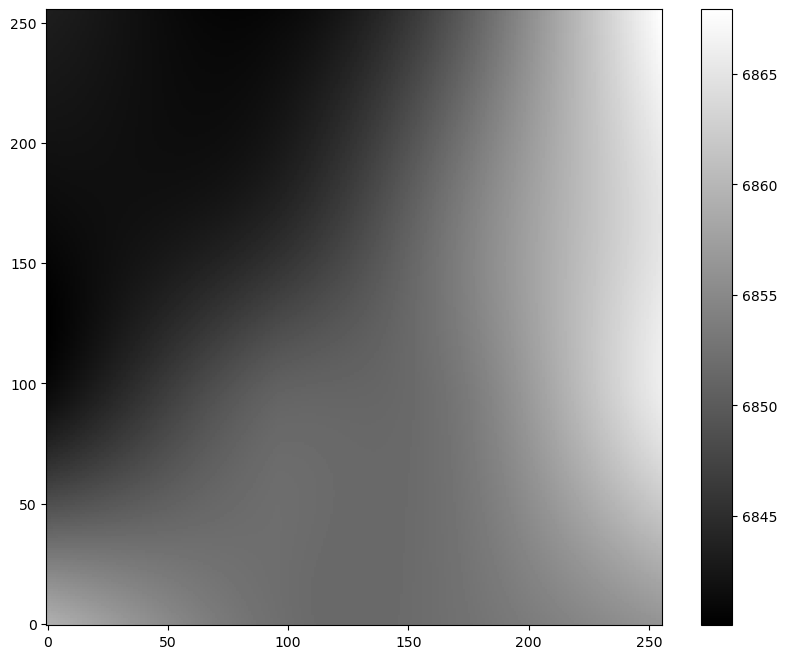

In [43]:

plt.figure()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("fitsimage2.png")
plt.show()

generate the noise map

In [45]:

bkg_rms = bkg.rms()

plot the noise map

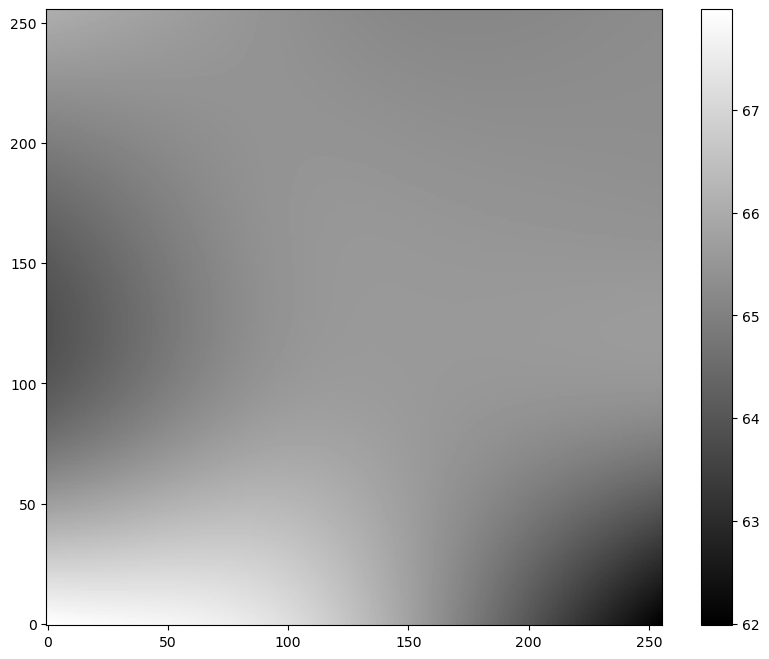

In [46]:

plt.figure()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("fitsimage3.png")
plt.show()

subtract background from image

In [47]:

data_sub = data - bkg


Find the number of objects <br>
where 1.5 is the detection threshold in rms<br>
and err=bkg.globalrms uses global rms 

In [33]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [34]:
# how many objects were detected
len(objects)

68

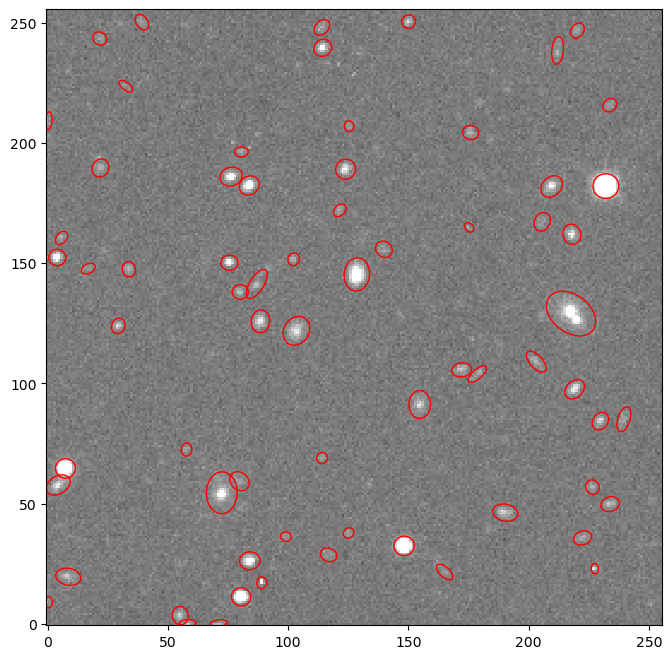

In [38]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig("fitsimage4.png")
plt.show()